
# WeatherPy

Data Analysis:
-Cities with a high humidity and cloudiness had a lower wind speed than those with a lower humidity and cloudiness. It is as if the amount of clouds dictates the level of humidity  and windspeed.
-A city's latitude dictates the their heat level or max temperature. I got this from the scatter plots, because I noted the way the latitude, temperature and cloudiness seemed to move in a certain way across the plot.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)
city = citipy

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [5]:
print(cities)

['albany', 'bambous virieux', 'tuktoyaktuk', 'mataura', 'la rioja', 'nanortalik', 'hobyo', 'taolanaro', 'namatanai', 'bethel', 'upernavik', 'constitucion', 'ribeira grande', 'corinth', 'bayan', 'srednekolymsk', 'rikitea', 'saint-pierre', 'auki', 'ushuaia', 'college', 'lasa', 'pingliang', 'marmaron', 'puerto ayora', 'miraflores', 'portland', 'lavrentiya', 'avarua', 'vaini', 'saldanha', 'young', 'shingu', 'qaanaaq', 'busselton', 'gewane', 'jalu', 'krasnaya polyana', 'hobart', 'ajaccio', 'okhotsk', 'airai', 'port alfred', 'clyde river', 'cururupu', 'butaritari', 'amuntai', 'tigil', 'victoria', 'starotimoshkino', 'ilulissat', 'baykit', 'punta arenas', 'saryshagan', 'alghero', 'malokakhovka', 'karauzyak', 'morondava', 'yarkovo', 'fortuna', 'coquimbo', 'carauari', 'antofagasta', 'sao filipe', 'leningradskiy', 'lolua', 'teahupoo', 'saint george', 'cabo san lucas', 'shimoda', 'plettenberg bay', 'cedar city', 'saleaula', 'lompoc', 'dmitriyevka', 'barrow', 'berezovyy', 'jamestown', 'ponta do sol

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Data list of Cities
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
date = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter =0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing record" + str(record_counter) +"of Set" + str(setcount) +"|" +city)
    try: 
        weather_response = requests.get(f"{url}{city}&appid={weather_api_key}").json()
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
    except:
        print("City Not Found, Pass...:" + city)

        
print(len(weather_response))      


processing record1of Set1|albany
processing record2of Set1|bambous virieux
processing record3of Set1|tuktoyaktuk
processing record4of Set1|mataura
processing record5of Set1|la rioja
processing record6of Set1|nanortalik
processing record7of Set1|hobyo
processing record8of Set1|taolanaro
City Not Found, Pass...:taolanaro
processing record9of Set1|namatanai
processing record10of Set1|bethel
processing record11of Set1|upernavik
processing record12of Set1|constitucion
processing record13of Set1|ribeira grande
processing record14of Set1|corinth
processing record15of Set1|bayan
processing record16of Set1|srednekolymsk
processing record17of Set1|rikitea
processing record18of Set1|saint-pierre
processing record19of Set1|auki
processing record20of Set1|ushuaia
processing record21of Set1|college
processing record22of Set1|lasa
processing record23of Set1|pingliang
processing record24of Set1|marmaron
City Not Found, Pass...:marmaron
processing record25of Set1|puerto ayora
processing record26of Set1

processing record5of Set5|naryan-mar
processing record6of Set5|tahe
processing record7of Set5|fort nelson
processing record8of Set5|luderitz
processing record9of Set5|kavaratti
processing record10of Set5|diamantino
processing record11of Set5|barentsburg
City Not Found, Pass...:barentsburg
processing record12of Set5|skibbereen
processing record13of Set5|maravatio
processing record14of Set5|tawau
processing record15of Set5|atuona
processing record16of Set5|jega
processing record17of Set5|avera
processing record18of Set5|rafai
processing record19of Set5|comodoro rivadavia
processing record20of Set5|ambon
processing record21of Set5|mys shmidta
City Not Found, Pass...:mys shmidta
processing record22of Set5|road town
processing record23of Set5|codrington
processing record24of Set5|tsihombe
City Not Found, Pass...:tsihombe
processing record25of Set5|pacific grove
processing record26of Set5|sitka
processing record27of Set5|abu dhabi
processing record28of Set5|bathsheba
processing record29of Se

processing record13of Set9|ilo
processing record14of Set9|jaciara
processing record15of Set9|dedham
processing record16of Set9|takoradi
processing record17of Set9|kulu
processing record18of Set9|grand centre
City Not Found, Pass...:grand centre
processing record19of Set9|kashi
processing record20of Set9|forbes
processing record21of Set9|grimstad
processing record22of Set9|rio branco do sul
processing record23of Set9|sur
processing record24of Set9|mount gambier
processing record25of Set9|jardim do serido
processing record26of Set9|glendive
processing record27of Set9|lostice
processing record28of Set9|karaul
City Not Found, Pass...:karaul
processing record29of Set9|brae
processing record30of Set9|batagay
processing record31of Set9|narsaq
processing record32of Set9|borama
City Not Found, Pass...:borama
processing record33of Set9|bara
processing record34of Set9|omboue
processing record35of Set9|nanding
processing record36of Set9|lichuan
processing record37of Set9|salamanca
processing recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Creating a DataFrame
city_data_df = pd.DataFrame({"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
                            })

pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,42.6001,-73.9662,296.51,89,100,1.05
1,Bambous Virieux,-20.3428,57.7575,293.27,62,79,7.65
2,Tuktoyaktuk,69.4541,-133.0374,275.09,84,5,8.49
3,Mataura,-46.1927,168.8643,282.86,61,20,1.23
4,La Rioja,42.2500,-2.5000,283.73,95,100,0.64


In [8]:
weather_dict = {"City":city_list,
                         "Lat":lat_list,
                         "Lng":lng_list,
                         "Max Temp":max_temp_list,
                         "Humidity":humidity_list,
                         "Cloudiness":cloudiness_list,
                         "Wind Speed":windspeed_list,
}
weather_dict

{'City': ['Albany',
  'Bambous Virieux',
  'Tuktoyaktuk',
  'Mataura',
  'La Rioja',
  'Nanortalik',
  'Hobyo',
  'Namatanai',
  'Bethel',
  'Upernavik',
  'Constitución',
  'Ribeira Grande',
  'Corinth',
  'Bayan',
  'Srednekolymsk',
  'Rikitea',
  'Saint-Pierre',
  'Auki',
  'Ushuaia',
  'College',
  'Laas',
  'Pingliang',
  'Puerto Ayora',
  'Miraflores',
  'Portland',
  'Lavrentiya',
  'Avarua',
  'Vaini',
  'Saldanha',
  'Young',
  'Shingū',
  'Qaanaaq',
  'Busselton',
  'Gewanē',
  'Jalu',
  'Krasnaya Polyana',
  'Hobart',
  "Arrondissement d'Ajaccio",
  'Okhotsk',
  'Airai',
  'Port Alfred',
  'Clyde River',
  'Cururupu',
  'Butaritari',
  'Amuntai',
  "Tigil'",
  'Hong Kong',
  'Starotimoshkino',
  'Ilulissat',
  'Baykit',
  'Punta Arenas',
  'Alghero',
  'Malokakhovka',
  'Morondava',
  'Yarkovo',
  'Fortuna',
  'Coquimbo',
  'Carauari',
  'Antofagasta',
  'São Filipe',
  'Leningradskiy',
  'Teahupoo',
  'Saint George',
  'Cabo San Lucas',
  'Shimoda',
  'Plettenberg Bay',
  '

In [9]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,42.6001,-73.9662,296.51,89,100,1.05
1,Bambous Virieux,-20.3428,57.7575,293.27,62,79,7.65
2,Tuktoyaktuk,69.4541,-133.0374,275.09,84,5,8.49
3,Mataura,-46.1927,168.8643,282.86,61,20,1.23
4,La Rioja,42.2500,-2.5000,283.73,95,100,0.64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

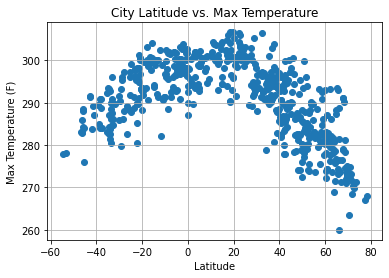

In [10]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.savefig('Max_temp.png')

## Latitude vs. Humidity Plot

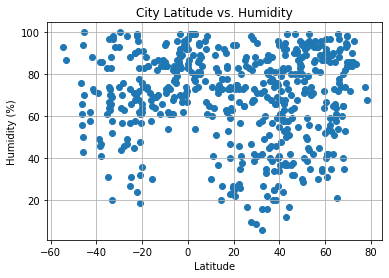

In [11]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png')

## Latitude vs. Cloudiness Plot

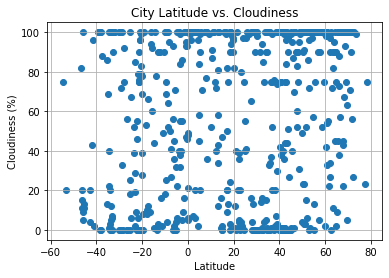

In [12]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_clouds.png')

## Latitude vs. Wind Speed Plot

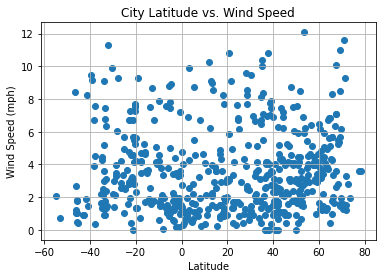

In [13]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_windspd.png')

## Linear Regression

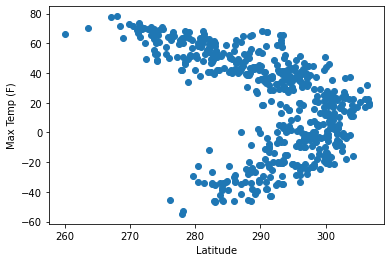

In [14]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Max Temp']
y_values = city_data_df['Lat']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

In [15]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df['Max Temp'],city_data_df['Lat'])

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      11.180358
1      16.243201
2      44.651378
3      32.509929
4      31.150462
         ...    
534     2.804789
535    10.852210
536    23.603075
537    14.399326
538     6.023758
Name: Max Temp, Length: 539, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.56x +474.51


In [18]:
# Create Northern and Southern Hemisphere DataFrames
northeren_hemisphere = city_data_df[city_data_df["Lat"] >=0]
northern_cities_count =len(northeren_hemisphere)
print("There are {} cities in the northeren hemisphere out of {} cities total, representing {:.1%} of all cities in the data set."
       .format(northern_cities_count, city_left_count, (northern_cities_count/city_left_count)))


NameError: name 'city_left_count' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.1770018798551769


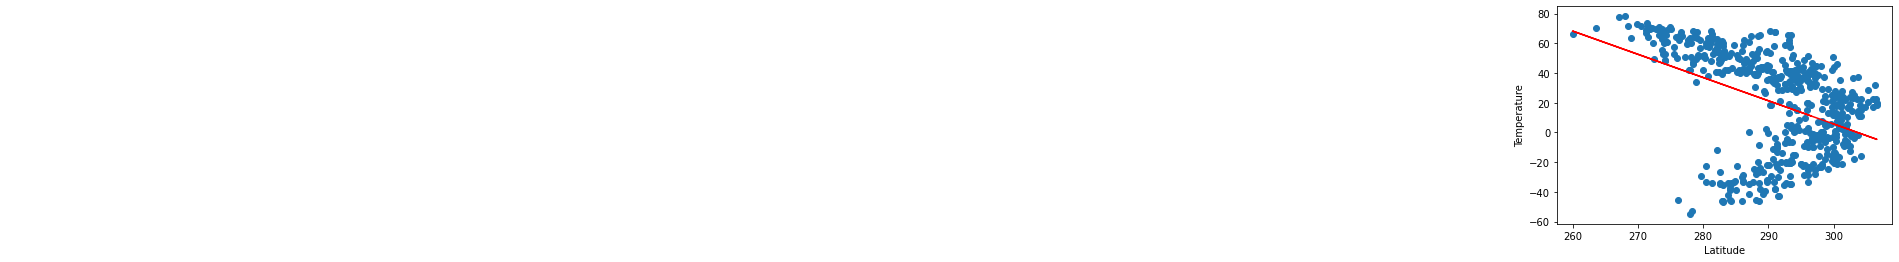

In [19]:
#Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression